In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [2]:
home = Path('R:/home')
top_dir = Path('R:/home/firefly_link/cancer')
save_dir = Path(top_dir, "analysis", "full",'cell_morphologies')
figure_save = Path(r'C:\Users\Firefly\Desktop\morphology_figure\scratch_assay')

In [13]:
t = '24h'
df_scratch = pd.read_csv(Path(save_dir, f'scratch_{t}_active_cell_morphologies.csv'))
df_inner = pd.read_csv(Path(save_dir, f'inner_{t}_active_cell_morphologies.csv'))

solidity 0.008984320434592467 0.9243885354989427 0.9409337188393025


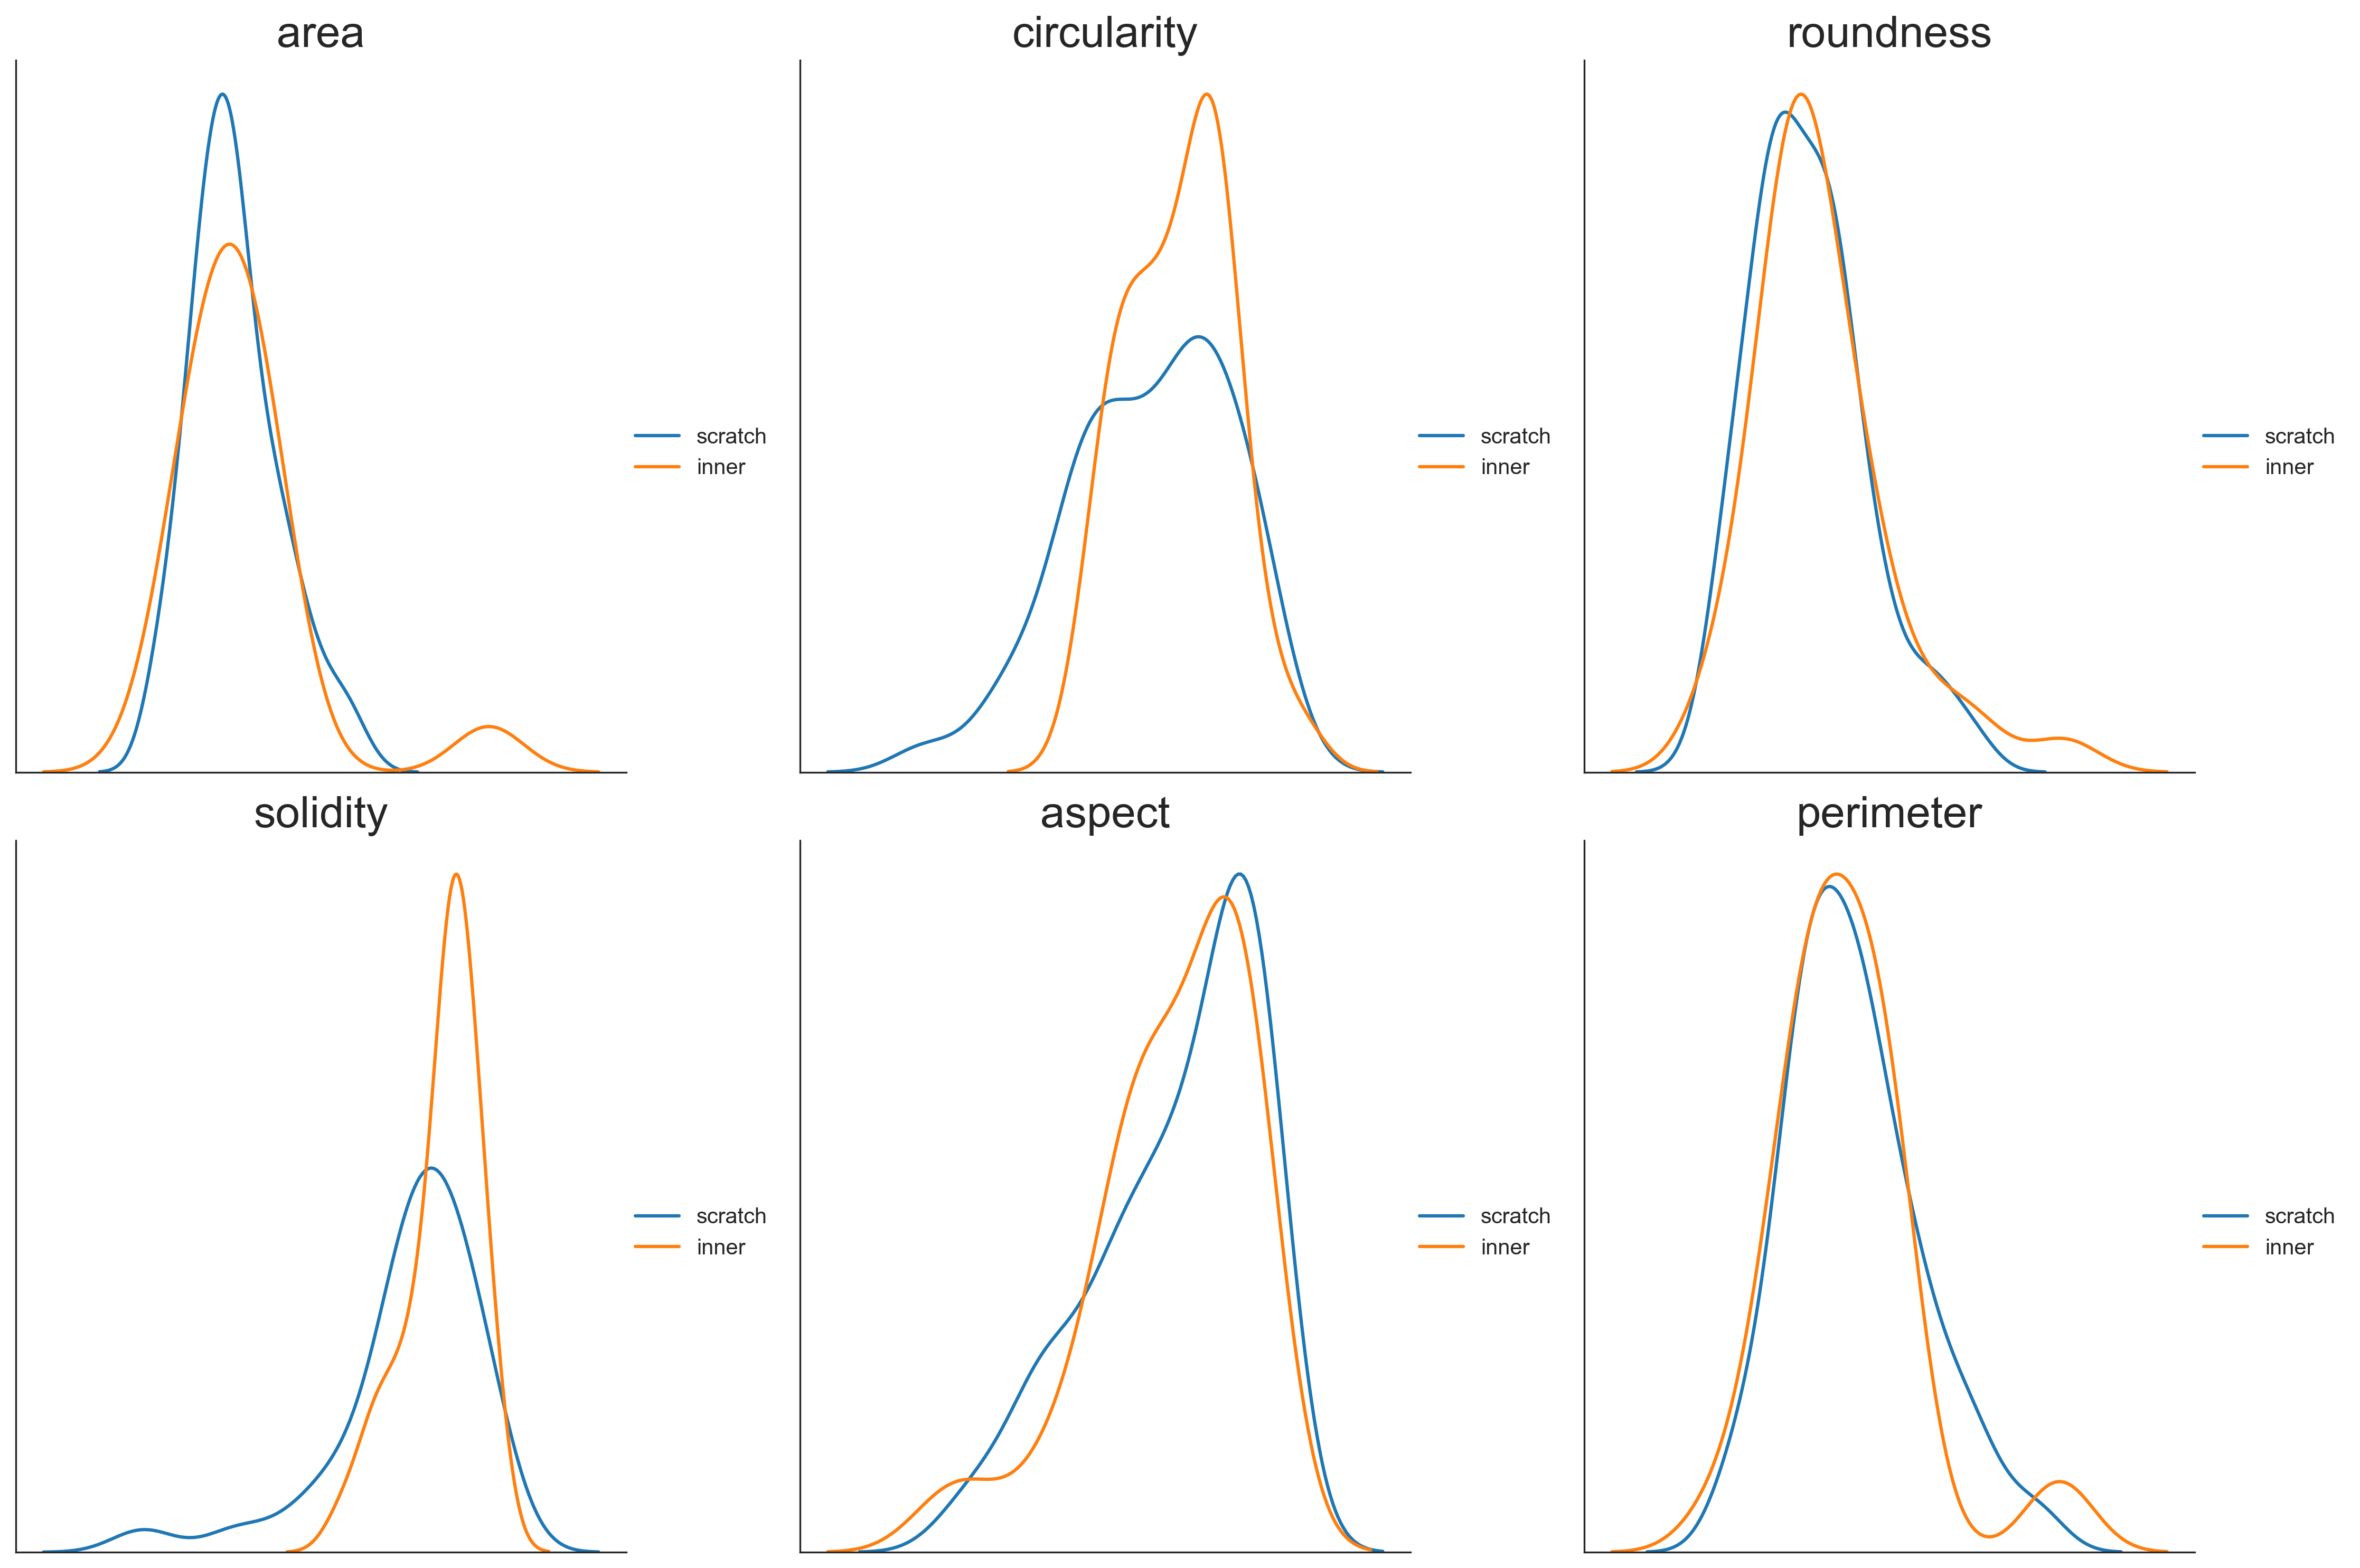

In [14]:
from scipy.stats import mannwhitneyu
from vsd_cancer.functions import stats_functions as statsf

plt.figure(figsize=(15,10),dpi=300)
f = open(Path(figure_save,f"p_morph_{t}.txt"), "w")

for i in range(6):
    c = df_scratch.columns[4+i]
    # Set up the plot
    plt.subplot(2, 3, i+1)
    scratch = df_scratch[c]
    inner = df_inner[c]
    U1, p1 = mannwhitneyu(scratch, inner)
    p2 = statsf.bootstrap_test(scratch.to_numpy(),inner.to_numpy())[0]
    #print(c,p1,p2)
    if p1 < 0.05:
        print(c,p1,scratch.mean(), inner.mean())
        f.write(c+': ')      
        f.write(str(p1)+ '\n')
        f.write(f'scratch mean: {scratch.mean()}'+ '\n')
        f.write(f'inner mean: {inner.mean()}'+ '\n')
    # Draw the plot
    sns.kdeplot(scratch,label = 'scratch')
    sns.kdeplot(inner,label = 'inner')

    sns.despine(top=True, right=True, left=False, bottom=False)
    sns.set_style('white')
    # Title and labels
    plt.title(c,fontsize=20)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(None)
    plt.ylabel(None)
    plt.legend(loc=[1,0.4],frameon=False)

plt.tight_layout()
plt.savefig(Path(figure_save,f'Morph - distribution -Scratch {t}.png'))
plt.show()

In [17]:
import glob, os

files = Path(save_dir).glob("scratch*active*.csv")
scratch_names = [str(f) for f in files]

files = Path(save_dir).glob("inner*active*.csv")
inner_names = [str(f) for f in files]

names = scratch_names + inner_names

df = pd.concat((pd.read_csv(f) for f in names), ignore_index=True)
df

,Unnamed: 0,exp_stage,trial,cell,area,circularity,roundness,solidity,aspect,perimeter
0,0,scratch_0h,cancer_20230302_slip1_area1_long_acq_cancer202...,24,260,0.764929,12.816951,0.942029,0.862209,65.355339
1,1,scratch_0h,cancer_20230302_slip1_area1_long_acq_cancer202...,32,348,0.812691,16.695753,0.953425,0.756151,73.355339
2,2,scratch_0h,cancer_20230302_slip1_area1_long_acq_cancer202...,34,315,0.947735,18.345816,0.975232,0.527075,64.627417
3,3,scratch_0h,cancer_20230302_slip1_area1_long_acq_cancer202...,40,261,0.924686,16.372527,0.970260,0.568924,59.556349
4,4,scratch_0h,cancer_20230302_slip1_area1_long_acq_cancer202...,45,332,0.587293,12.037536,0.929972,0.937387,84.284271
...,...,...,...,...,...,...,...,...,...,...
1090,52,inner_6h,cancer_20230324_slip2_area5_long_acq_cancer202...,142,429,0.949378,21.888881,0.966216,0.479048,75.355339
1091,53,inner_6h,cancer_20230324_slip2_area5_long_acq_cancer202...,161,339,0.855583,18.998695,0.957627,0.519925,70.562446
1092,54,inner_6h,cancer_20230324_slip2_area5_long_acq_cancer202...,162,377,0.924165,20.385549,0.961735,0.486005,71.597980
1093,55,inner_6h,cancer_20230324_slip2_area6_long_acq_cancer202...,71,449,0.696392,15.550163,0.939331,0.904355,90.012193


scratch_0h vs. inner_0h: Mann-Whitney-Wilcoxon test two-sided, P_val:3.527e-01 U_stat=3.860e+02
scratch_6h vs. inner_6h: Mann-Whitney-Wilcoxon test two-sided, P_val:5.959e-02 U_stat=6.300e+01
scratch_12h vs. inner_12h: Mann-Whitney-Wilcoxon test two-sided, P_val:1.091e-01 U_stat=2.300e+01
scratch_24h vs. inner_24h: Mann-Whitney-Wilcoxon test two-sided, P_val:8.148e-01 U_stat=3.300e+01
scratch_0h vs. inner_0h: Mann-Whitney-Wilcoxon test two-sided, P_val:8.750e-01 U_stat=4.630e+02
scratch_6h vs. inner_6h: Mann-Whitney-Wilcoxon test two-sided, P_val:1.561e-01 U_stat=1.420e+02
scratch_12h vs. inner_12h: Mann-Whitney-Wilcoxon test two-sided, P_val:4.242e-02 U_stat=3.000e+00
scratch_24h vs. inner_24h: Mann-Whitney-Wilcoxon test two-sided, P_val:1.246e-01 U_stat=1.900e+01
scratch_0h vs. inner_0h: Mann-Whitney-Wilcoxon test two-sided, P_val:2.032e-01 U_stat=3.620e+02
scratch_6h vs. inner_6h: Mann-Whitney-Wilcoxon test two-sided, P_val:1.329e-01 U_stat=7.200e+01
scratch_12h vs. inner_12h: Mann-

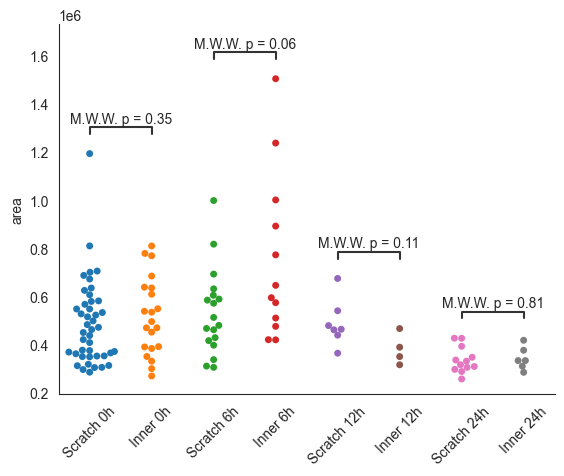

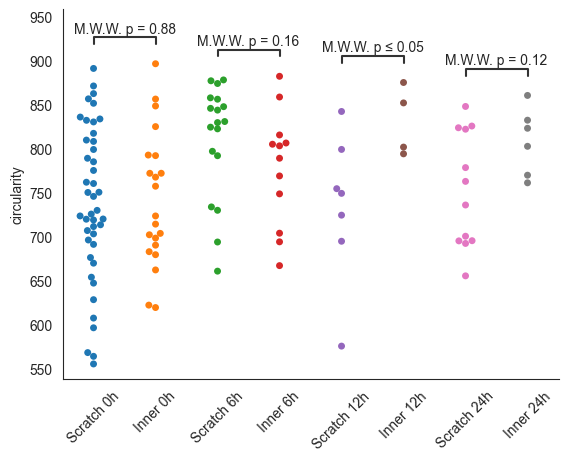

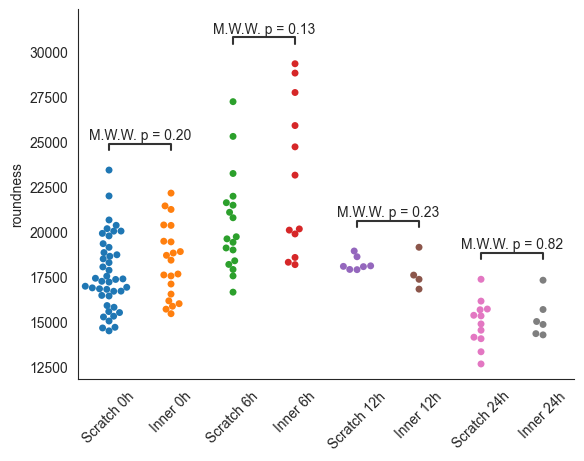

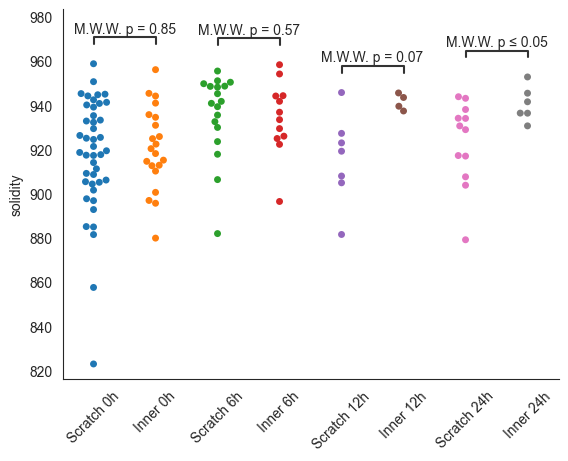

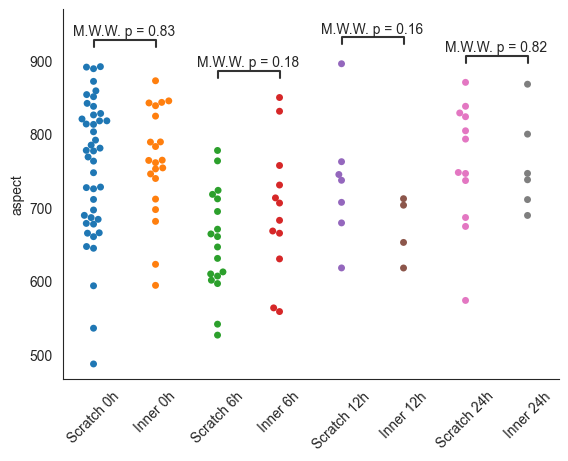

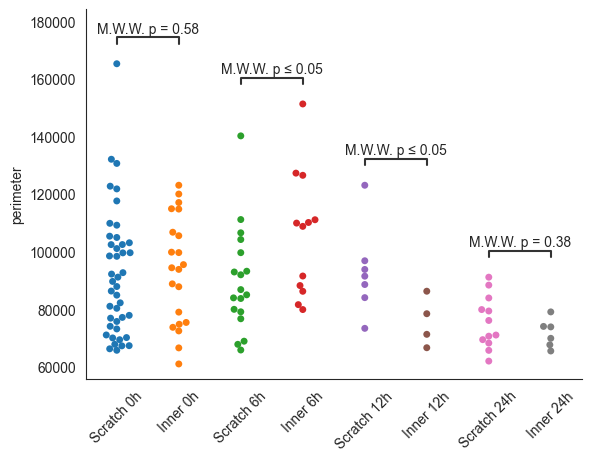

In [24]:
figsave = figure_save
from statannot import add_stat_annotation
from statannotations.Annotator import Annotator
lines = ['scratch_0h','inner_0h','scratch_6h','inner_6h','scratch_12h','inner_12h','scratch_24h','inner_24h',]

names = ['Scratch 0h','Inner 0h','Scratch 6h','Inner 6h','Scratch 12h','Inner 12h','Scratch 24h','Inner 24h',]
#names = [" ".join(x.split("_")[:]) for x in lines]
#names = ['MCF10A','MCF10A+TGF\u03B2','T-47D','BT-474','MDA-MB-453','MDA-MB-468','Cal-51','SUM159','MDA-MB-231','Hs578T']

df= df[df.exp_stage.isin(lines)]
#print(df.trial.unique())

for i in range(6):
    column = df.columns[4+i]
    results_trial = []

    results_slip = []

    for l in lines:
        results_trial.append(
            df[df.exp_stage == l]
            .groupby("trial")
            .mean()[column]
            .to_numpy()
        )
        '''
        results_slip.append(
            df[df.exp_stage == l]
            .groupby("day_slip")
            .mean()[column]
            .to_numpy()
        )
        '''

    plot_df = pd.DataFrame()
    plot_df = df.groupby(['exp_stage','trial']).mean()[column].reset_index()
    plot_df[column] = plot_df[column]*1000
    fig, ax = plt.subplots()

    ax = sns.swarmplot(x='exp_stage', y=column,data=plot_df, order = lines) 
    '''
    for idx, (l, res) in enumerate(zip(lines, results_trial)):
        ax.plot(np.ones(len(res)) * idx, res * 1000, '.')

    '''


    pairs = [('scratch_0h', 'inner_0h'),  
             ('scratch_6h', 'inner_6h'),   
             ('scratch_12h', 'inner_12h'),
             ('scratch_24h', 'inner_24h'),]   



    #formatted_pvalues = [f"p={p:.2e}" for p in pvalues]

    annotator = Annotator(ax, pairs, x='exp_stage', y=column,data=plot_df, order = lines)
    #annotator.set_custom_annotations(formatted_pvalues)
    #annotator.set_pvalues(pvalues)
    annotator.configure(text_format="simple", test='Mann-Whitney')
    #annotator.set_pvalues(pvalues).annotate()
    #annotator.annotate()
    annotator.apply_and_annotate()

    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    ax.set_xticks(range(len(lines)))
    ax.set_xticklabels(names, rotation=45)
    ax.set_xlabel("")
    ax.set_ylabel(column)
    #pf.set_thickaxes(ax, 3)
    #pf.set_all_fontsize(ax, 16)
    fig.savefig(
        Path(figsave, f"{column}.png"),
        bbox_inches="tight",
        dpi=300,
        transparent=True,
    )

In [19]:
df.columns

Index(['Unnamed: 0', 'exp_stage', 'trial', 'cell', 'area', 'circularity',
       'roundness', 'solidity', 'aspect', 'perimeter'],
      dtype='object')

In [129]:
morph = pd.concat([df_scratch,df_inner])
morph

,Unnamed: 0,exp_stage,trial,cell,area,circularity,roundness,solidity,aspect,perimeter
0,0,scratch_24h,cancer_20230303_slip1_area1_long_acq_cancer202...,12,435,0.619423,14.030767,0.927505,0.929260,93.941125
1,1,scratch_24h,cancer_20230303_slip1_area1_long_acq_cancer202...,24,506,0.687317,17.660186,0.889279,0.847968,96.183766
2,2,scratch_24h,cancer_20230303_slip1_area1_long_acq_cancer202...,41,424,0.352111,10.256222,0.798493,0.977359,123.012193
3,3,scratch_24h,cancer_20230303_slip1_area1_long_acq_cancer202...,48,169,0.686308,9.172223,0.913514,0.915073,55.627417
4,4,scratch_24h,cancer_20230303_slip1_area1_long_acq_cancer202...,51,228,0.825718,16.193398,0.919355,0.348827,58.905592
...,...,...,...,...,...,...,...,...,...,...
31,31,inner_24h,cancer_20230303_slip3_area5_long_acq_cancer202...,114,378,0.723771,14.730484,0.937965,0.889019,81.012193
32,32,inner_24h,cancer_20230303_slip3_area6_long_acq_cancer202...,19,154,0.956916,11.925965,0.944785,0.686355,44.970563
33,33,inner_24h,cancer_20230303_slip3_area6_long_acq_cancer202...,20,153,0.965379,12.396379,0.950311,0.610448,44.627417
34,34,inner_24h,cancer_20230303_slip3_area6_long_acq_cancer202...,54,182,0.860433,11.455080,0.947917,0.821325,51.556349


In [130]:
from scipy import stats

morph_norm = morph.copy()
for i in range(6):
    
    morph_norm.iloc[:,i+4], fitted_lambda = stats.boxcox(morph.iloc[:,4+i])
morph_norm

,Unnamed: 0,exp_stage,trial,cell,area,circularity,roundness,solidity,aspect,perimeter
0,0,scratch_24h,cancer_20230303_slip1_area1_long_acq_cancer202...,12,9.742202,-0.298975,1.449480,-0.043170,-0.067221,5.866593
1,1,scratch_24h,cancer_20230303_slip1_area1_long_acq_cancer202...,24,10.110837,-0.257372,1.505768,-0.051981,-0.135970,5.905208
2,2,scratch_24h,cancer_20230303_slip1_area1_long_acq_cancer202...,41,9.680549,-0.415679,1.361346,-0.059307,-0.022278,6.313812
3,3,scratch_24h,cancer_20230303_slip1_area1_long_acq_cancer202...,48,7.611437,-0.258027,1.326358,-0.047071,-0.079865,5.033870
4,4,scratch_24h,cancer_20230303_slip1_area1_long_acq_cancer202...,51,8.254994,-0.156962,1.485326,-0.045553,-0.380811,5.122587
...,...,...,...,...,...,...,...,...,...,...
31,31,inner_24h,cancer_20230303_slip3_area5_long_acq_cancer202...,114,9.406911,-0.232971,1.461945,-0.039597,-0.102370,5.626480
32,32,inner_24h,cancer_20230303_slip3_area6_long_acq_cancer202...,19,7.417294,-0.042018,1.405530,-0.036913,-0.246989,4.709139
33,33,inner_24h,cancer_20230303_slip3_area6_long_acq_cancer202...,20,7.403784,-0.033933,1.416324,-0.034508,-0.288018,4.697581
34,34,inner_24h,cancer_20230303_slip3_area6_long_acq_cancer202...,54,7.768115,-0.128439,1.394060,-0.035577,-0.156579,4.916963


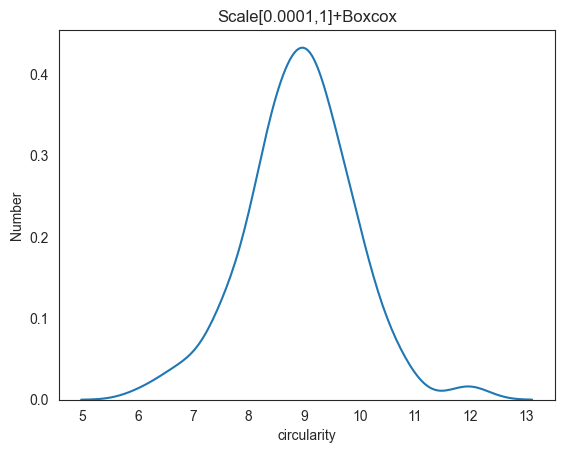

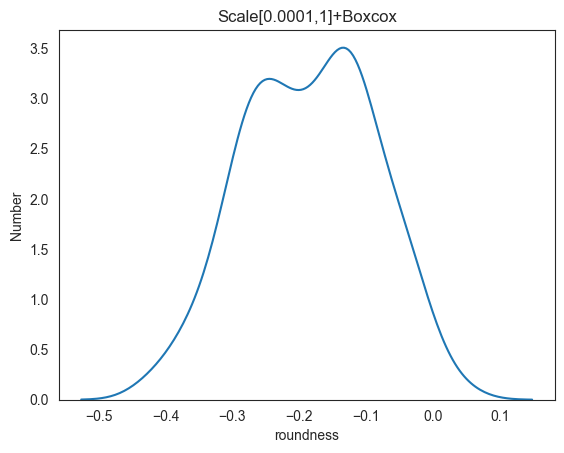

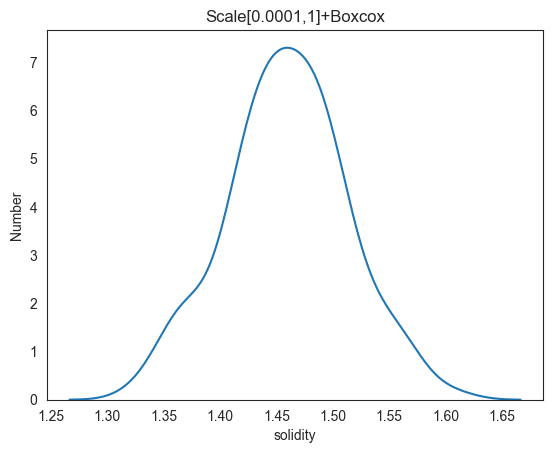

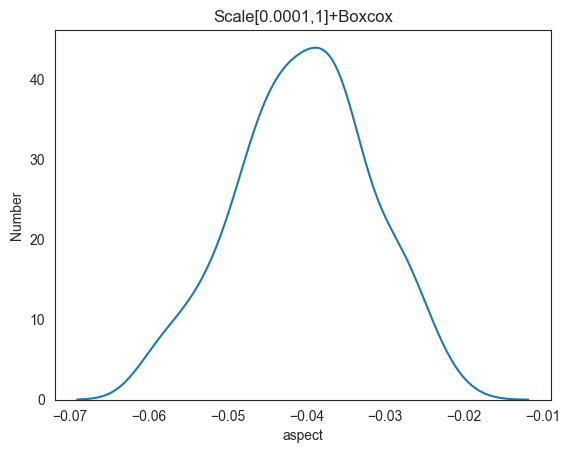

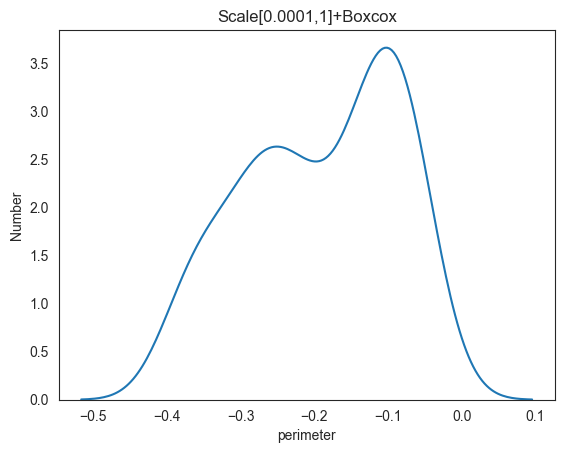

IndexError: index 5 is out of bounds for axis 0 with size 5

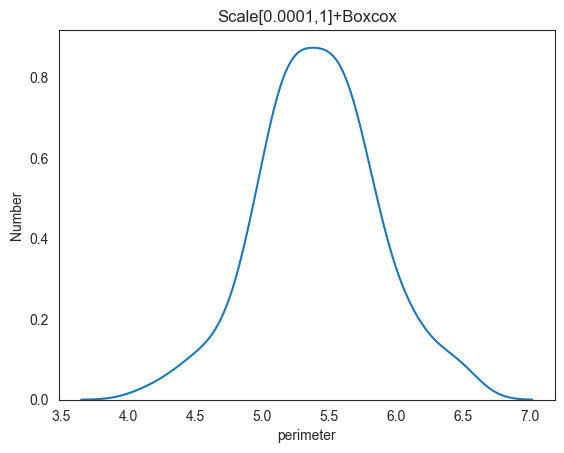

In [131]:
for i in range(6):
    #sns.kdeplot(morph.iloc[:,i+4])
    sns.kdeplot(morph_norm.iloc[:,i+4])
    #fig = plt.figure()
    #res = stats.probplot(feature.iloc[:,i], plot=plt)
    plt.title('Scale[0.0001,1]+Boxcox')
    plt.ylabel('Number')
    plt.xlabel(fb.columns[i])
    #plt.savefig(fb.columns[i])
    plt.show()

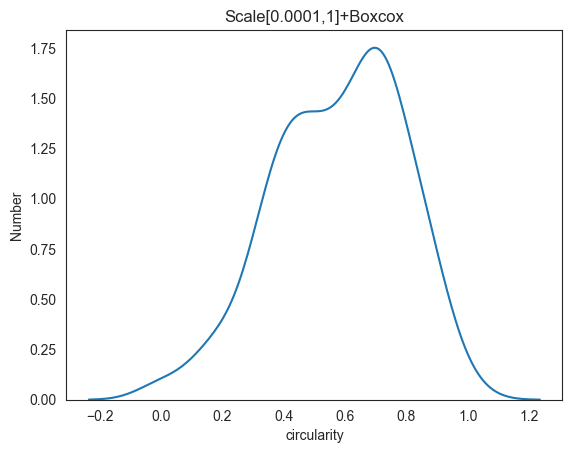

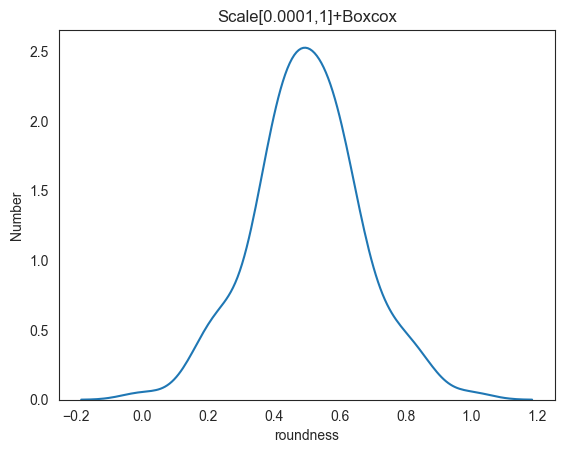

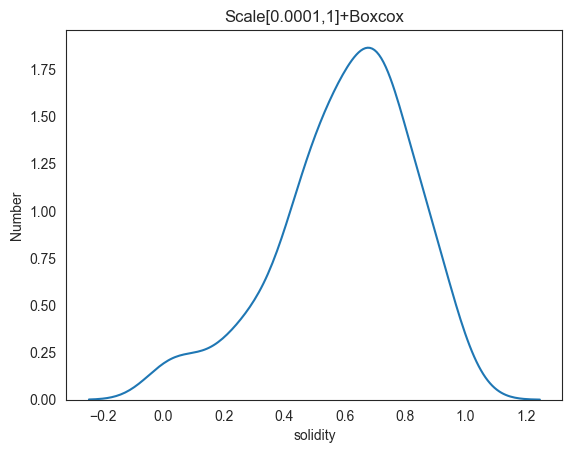

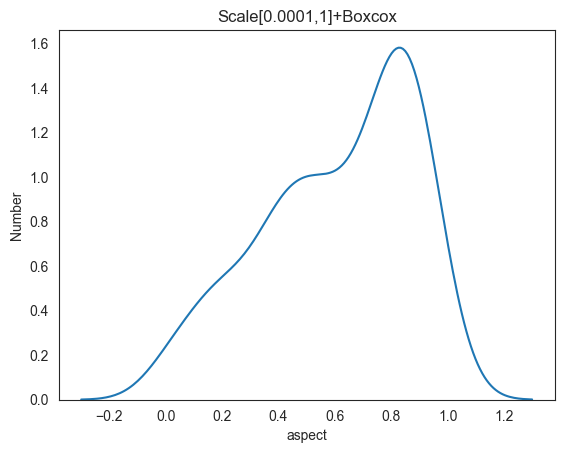

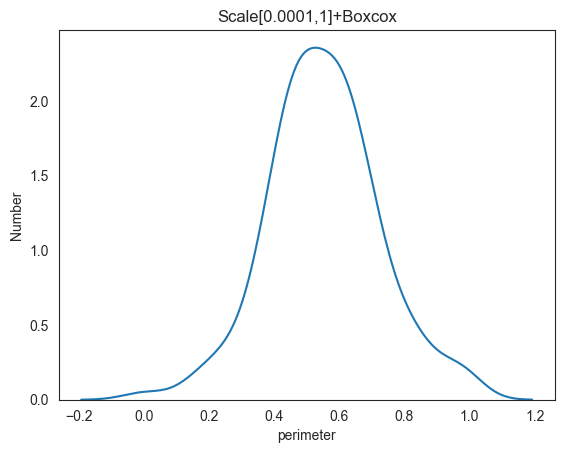

In [132]:
f=morph.iloc[:,5:]
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import palettable
import scipy.stats as spstats
min_max_scaler = MinMaxScaler(feature_range=(0.0001,1))
fb = min_max_scaler.fit_transform(f)
fb=pd.DataFrame(fb)

for i in range(f.shape[1]):
    feature=np.array(fb.iloc[:,i])
    l,opt_lambda=spstats.boxcox(feature)
    #print('Optimal lambda value:', opt_lambda)
    f.iloc[:,i]=spstats.boxcox(fb.iloc[:,i],lmbda=opt_lambda)

fb= MinMaxScaler(feature_range=(0,1)).fit_transform(f)
fb= pd.DataFrame(fb)
fb.columns=f.columns

for i in range(fb.shape[1]):
    sns.kdeplot(fb.iloc[:,i])
    #sns.kdeplot(f.iloc[:,i])
    #fig = plt.figure()
    #res = stats.probplot(feature.iloc[:,i], plot=plt)
    plt.title('Scale[0.0001,1]+Boxcox')
    plt.ylabel('Number')
    plt.xlabel(fb.columns[i])
    #plt.savefig(fb.columns[i])
    plt.show()

Variance of PCA:
[0.13316346 0.10381227]
Variance Ratio:
[0.5297518  0.41298672]
Number of principle components: 2


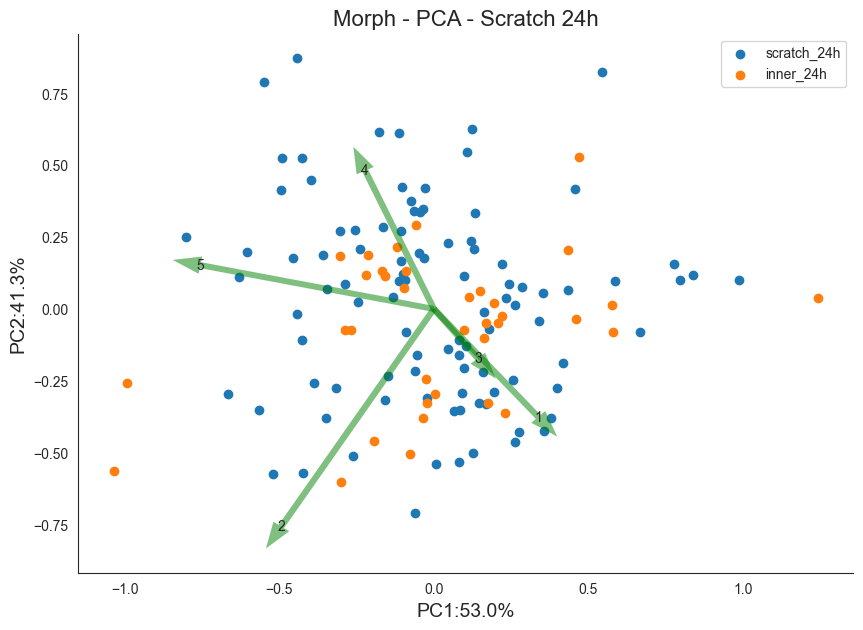

In [133]:
mcf_filt=morph
mcf_filt.index = np.arange(mcf_filt.shape[0])
pca = PCA(n_components=0.8)
new_pca = pd.DataFrame(pca.fit_transform(f))
print('Variance of PCA:')
print(pca.explained_variance_)

print('Variance Ratio:')
print(pca.explained_variance_ratio_) 
importance = pca.explained_variance_ratio_
c=pca.components_

#print('输出主成分系数阵:默认列是指标，行是指标在成为上的系数')
#print(pca.components_)

print('Number of principle components: {}'.format(pca.n_components_))

t0=new_pca[mcf_filt['exp_stage']==f'scratch_{t}']
t1=new_pca[mcf_filt['exp_stage']==f'inner_{t}']

plt.figure(figsize=(10,7))

plt.scatter(t0.iloc[:,0],t0.iloc[:,1],marker='o',label=f'scratch_{t}')
plt.scatter(t1.iloc[:,0],t1.iloc[:,1],marker='o',label=f'inner_{t}')
plt.xlabel(f'1st PC:{round(importance[0]*100,1)}%',fontsize=14)
plt.ylabel(f'2nd PC:{round(importance[1]*100,1)}%',fontsize=14)

kwargs={'linestyle':'-', 'lw':0.1, 'width':0.02} 
for i in range(c.shape[1]):
    plt.arrow(0,0,c[0,i],c[1,i],alpha=0.5,ec='green',fc='green',**kwargs)
    plt.text(c[0,i],c[1,i],f'{i+1}', ha="center", va="center")
plt.xlabel(f'PC1:{round(importance[0]*100,1)}%',fontsize=14)  
plt.ylabel(f'PC2:{round(importance[1]*100,1)}%',fontsize=14)
#plt.xlabel(r'MCF10A/MCF10A_TGFβ PC1',fontsize=14)  
#plt.ylabel(r'MCF10A/MCF10A_TGFβ PC2',fontsize=14)

plt.legend()
sns.despine()
plt.title(rf'Morph - PCA - Scratch {t}',fontsize=16)
plt.savefig(Path(figure_save,f'Morph - PCA -Scratch {t}.png'))
plt.show()

C:\Users\Firefly\anaconda3\envs\cancer_tutorial\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\Firefly\anaconda3\envs\cancer_tutorial\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


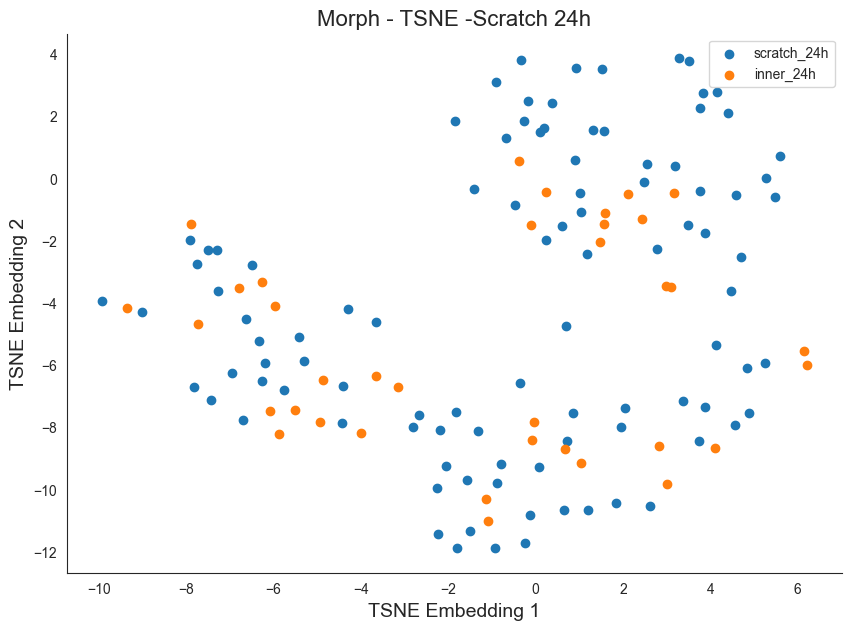

In [134]:
from sklearn.manifold import TSNE

tsne=TSNE()
new_tsne = pd.DataFrame(tsne.fit_transform(f))

t1=new_tsne[mcf_filt['exp_stage']==f'scratch_{t}']
t2=new_tsne[mcf_filt['exp_stage']==f'inner_{t}']

fig=plt.figure(figsize=(10,7))
ax=fig.add_subplot(111)

ax.scatter(t1.iloc[:,0],t1.iloc[:,1],label=f'scratch_{t}',marker='o')
ax.scatter(t2.iloc[:,0],t2.iloc[:,1],label=f'inner_{t}',marker='o')

#ax.set_xlim([-1.5,1.5])
#ax.set_ylim([-0.75,1.25])
plt.xlabel(r'TSNE Embedding 1',fontsize=14)  
plt.ylabel(r'TSNE Embedding 2',fontsize=14)
plt.legend()
sns.despine()
plt.title(f'Morph - TSNE -Scratch {t}',fontsize=16)
plt.savefig(Path(figure_save,f'Morph - TSNE -Scratch {t}.png'))
plt.show()